# Sales Analysis

#### Import Necessary Libraries

In [4]:
import pandas as pd
import os

### Task 1:Merging 12 months of sales data into single file

In [3]:
files = [file for file in os.listdir('Sales_Data/')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])

all_month_data.to_csv("all_data.csv", index = False)                  #! header row duplicated

##### Read in updated dataframe

In [7]:
all_data= pd.read_csv("all_month_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up data

#### Drop nan rows

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' and delete it

In [9]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convert columns to correct type

In [11]:
# all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
# all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convert Order Date columns to correct type

In [12]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

C:\Users\Riko\AppData\Local\Temp\ipykernel_9760\1435542791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


## Augment data with additional columns

### Task 2:Add Month Column

In [17]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Task 3:Add Sales Column

In [18]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4:Add City Column

In [19]:
### apply()  
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]              # second split result = ['', 'TX', '75001']

# all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])       ##########????????
# all_data['City'] = all_data['Purchase Address'].apply(get_city)

# all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + ' (' + get_state(x)+ ')')

all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Task 5:Add Hour & Minute Column

In [20]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


## Q 1: What is the best month for sales? How much was earned that month?

In [77]:
Q1_results = all_data.groupby('Month').sum()

In [78]:
Q1_results['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [79]:
Q1_results['Sales'].max()

4613443.34

<Axes: xlabel='Month'>

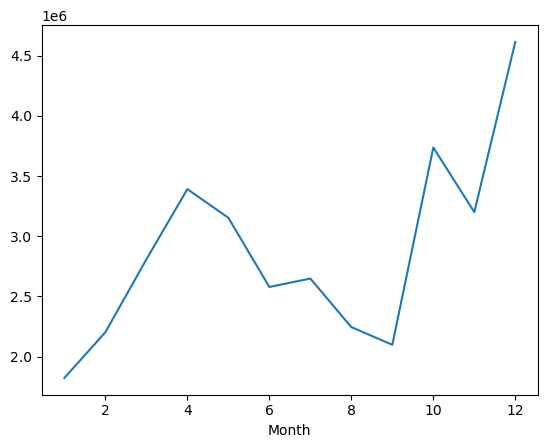

In [80]:
Q1_results['Sales'].plot()

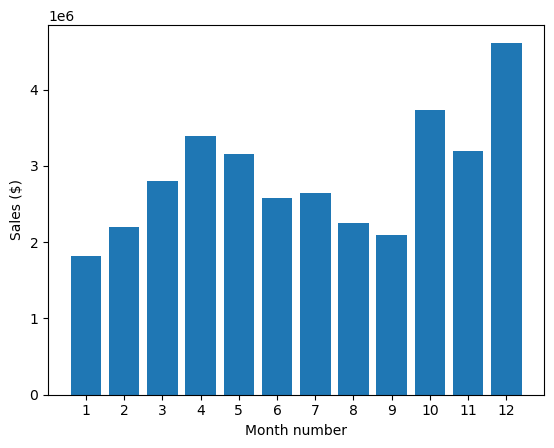

In [101]:
import matplotlib.pyplot as plt                                      ##########!!!!!!!!!!!!

months = range(1, 13)

plt.bar(months, Q1_results['Sales'])
plt.xticks(months)
plt.ylabel('Sales ($)')
plt.xlabel('Month number')

plt.show()

## Q 2: What city had highest number of sales?

In [82]:
Q2_results = all_data.groupby('City').sum()

In [84]:
Q2_results['Sales']

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

In [99]:
Q2_results['Sales'].max()

8262203.91

<Axes: xlabel='City'>

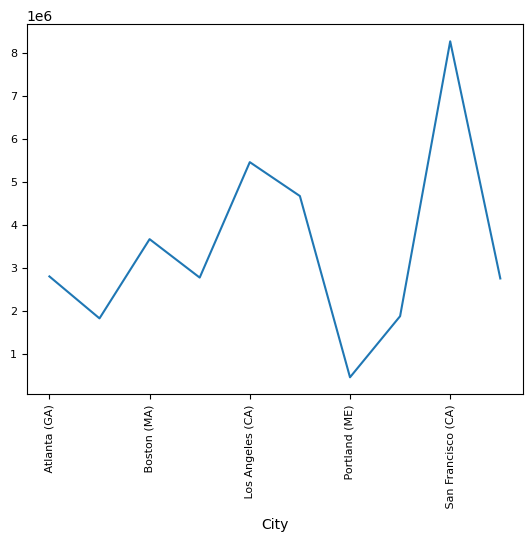

In [117]:
Q2_results['Sales'].plot(rot=90, fontsize=8)

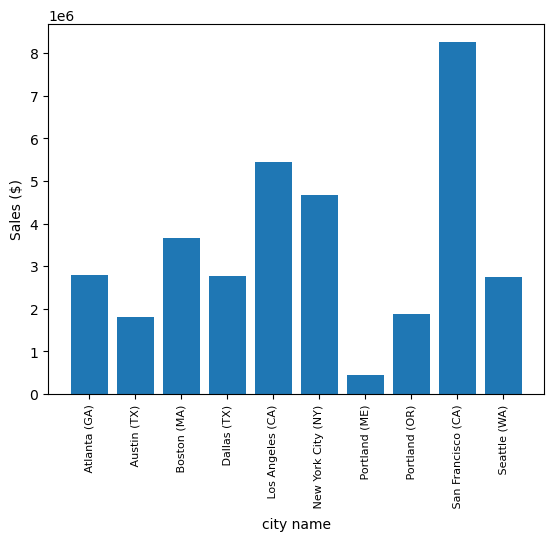

In [169]:
import matplotlib.pyplot as plt                                      ##########!!!!!!!!!!!!

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, Q2_results['Sales'])
plt.xticks(cities, rotation ='vertical', size = 8)
plt.ylabel('Sales ($)')
plt.xlabel('city name')

plt.show()

## Q 3: What time should we display advertisements to maximize likelihood of customer's buying product?

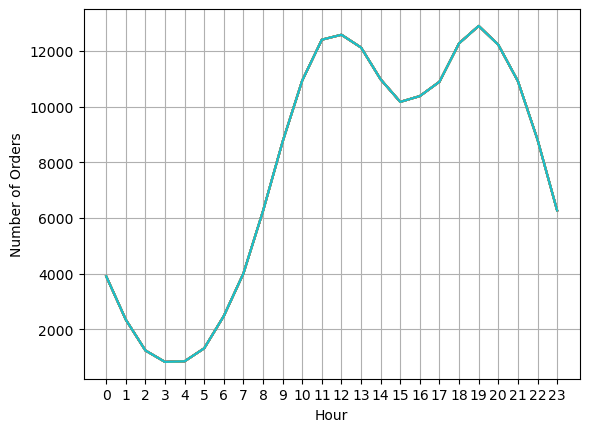

In [140]:
# (11am & 7pm)

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
# all_data.groupby('Hour').count()

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

plt.show()

## Q 4: What products are most often sold together?

In [188]:
'''
all_data['Order ID'].value_counts()
all_data.loc[all_data['Order ID'] == '160873']
'''

df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['groubed'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))        ##########!!!!!!!!!!!!

df = df[['Order ID', 'groubed']].drop_duplicates()

df.head()

C:\Users\Riko\AppData\Local\Temp\ipykernel_19144\3683972577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['groubed'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))        ##########!!!!!!!!!!!!


,Order ID,groubed
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [187]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['groubed']:
    row_list =  row.split(',')
    count.update(Counter(combinations(row_list, 2)))                          ##########!!!!!!!!!!!!

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Q 5: What product sold the most? Why do you think it sold the most?

In [196]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [21]:
product_group = all_data.drop(columns = ['Order Date', 'Order ID', 'Purchase Address', 'City']).groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

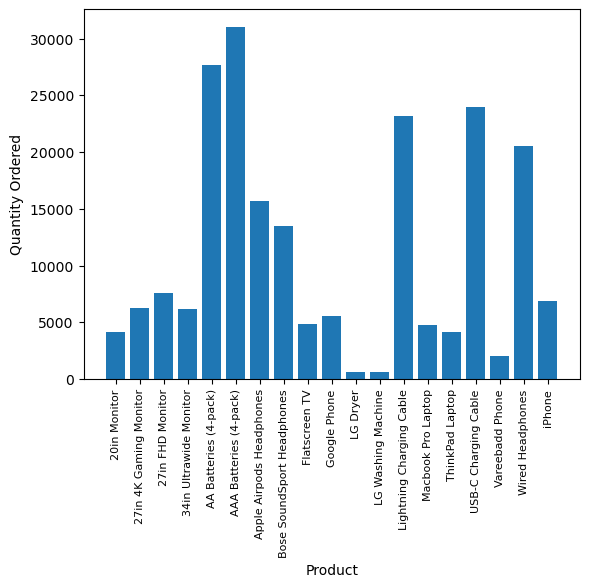

In [211]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation='vertical', size = 8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.show()

In [215]:
prices = all_data.groupby('Product')[['Price Each']].mean()
prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


C:\Users\Riko\AppData\Local\Temp\ipykernel_19144\3053441651.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size = 8)


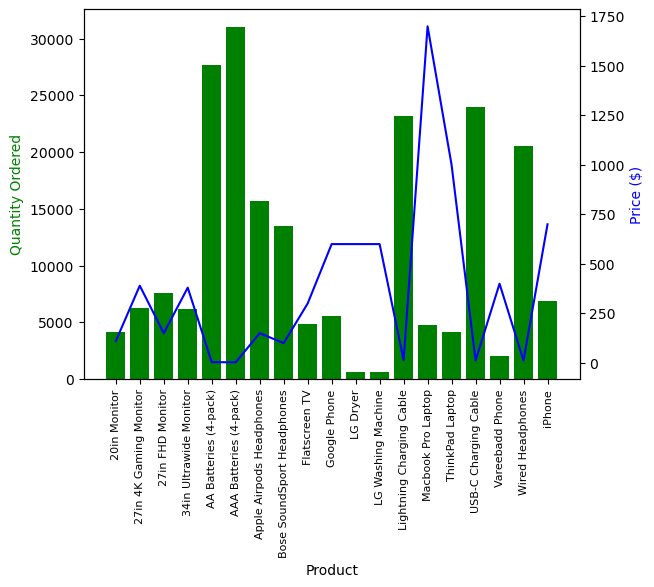

In [221]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(products, rotation='vertical', size = 8)

plt.show()